In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import average
import json

In [2]:
java8 = {
    'sort':
        [12612, 12583, 11750, 11725, 11649, 11658, 11610, 11621, 11456, 11659, 11601, 11697, 11596, 11710, 11824,
         11655, 11647, 11758, 11668, 11836, 11634, 11691, 11761, 11717, 11785, 11648, 11629, 11780, 11690, 11738,
         11596, 11668, 11748, 11680, 11609, 11592, 11665, 11793, 11685, 11673, 11702, 11662, 11839, 11622, 11669,
         11682, 11642, 11788, 11594, 11665],
    'binarytree': [9917, 9150, 9029, 8750, 8999, 8781, 9269, 8773, 8814, 9281, 8778, 8802, 8756, 9264, 8665, 8669,
                   8690, 8662, 8649, 8764, 8847, 8864, 8898, 8878, 8712, 8877, 8748, 8793, 8790, 9320, 8767, 8788,
                   8804, 8813, 8825, 8860, 8802, 8824, 8849, 8814, 8798, 8838, 8826, 8822, 8802, 8805, 8821, 8846,
                   8826, 8813],
    'fannkuchredux':
        [9040, 8902, 8392, 8431, 8506, 8381, 8399, 8418, 8420, 8523, 8655, 8611, 8645, 8628, 8571, 8495,
         8551, 8545, 8628, 8555, 8558, 8690, 8614, 8595, 8638, 8610, 8589, 8598, 8552, 8568, 8580, 8599,
         8662, 8630, 8570, 8630, 8472, 8646, 8612, 8513, 8605, 8638, 8520, 8580, 8597, 8590, 8710, 8704,
         8664, 8683],
    'fib': [14183, 13547, 13435, 13425, 13414, 13413, 13519, 13711, 13671, 13651, 13639, 13624, 13662, 13674, 13640,
            13640, 13652, 13683, 13652, 13679, 13620, 13676, 13612, 13661, 13655, 13675, 13601, 13665, 13658, 13632,
            13625, 13680, 13648, 13666, 13644, 13674, 13678, 13620, 13625, 13615, 13611, 13633, 13611, 13693, 13614,
            13686, 13610, 13630, 13641, 13692]}

graal = {
    'sort': [11897, 9736, 9686, 9734, 9700, 9721, 9810, 9633, 9587, 9589, 9569, 9575, 9538, 9602, 9611, 9565, 9597,
             9592, 9598, 9660, 9596, 9639, 9577, 9609, 9605, 9579, 9606, 9603, 9592, 9599, 9579, 9578, 9599, 9601,
             9643, 9598, 9650, 9600, 9583, 9624, 9587, 9620, 9643, 9602, 9616, 9586, 9620, 9662, 9631, 9622],
    'binarytree': [10217, 7501, 7338, 7468, 7250, 7253, 7256, 7263, 7255, 7257, 7160, 7225, 7157, 7137, 7125,
                   7157, 7154, 7172, 7164, 7111, 7124, 7153, 7160, 7147, 7128, 7132, 7199, 7111, 7118, 7173,
                   7170, 7131, 7137, 7162, 7213, 7131, 7142, 7176, 7100, 7146, 7140, 7157, 7108, 7156, 7171,
                   7138, 7142, 7147, 7174, 7135],
    'fannkuchredux': [8716, 6468, 6290, 6265, 6258, 6235, 6270, 6271, 6261, 6306, 6280, 6284, 6295, 6303, 6377,
                      6334, 6326, 6341, 6370, 6357, 6334, 6336, 6347, 6357, 6383, 6368, 6346, 6354, 6384, 6361,
                      6376, 6349, 6383, 6360, 6358, 6400, 6365, 6378, 6397, 6363, 6373, 6396, 6386, 6355, 6370,
                      6353, 6354, 6368, 6368, 6377],
    'fib': [13867, 11833, 11772, 11792, 11800, 11788, 11827, 11819, 11850, 11839, 11882, 11926, 11907, 11940,
            11961, 11962, 11962, 11938, 11974, 11983, 11995, 11984, 11976, 11954, 11987, 11977, 12033, 12036,
            11987, 11986, 12009, 12003, 11996, 11967, 11982, 11980, 11966, 12010, 11987, 11989, 11994, 12061,
            12017, 12013, 11967, 12014, 11976, 12052, 12031, 12007]}


# Oracle vs Graal

fib
x1.14
sort
x1.22
binarytree
x1.23
fannkuchredux
x1.35


/home/manuel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


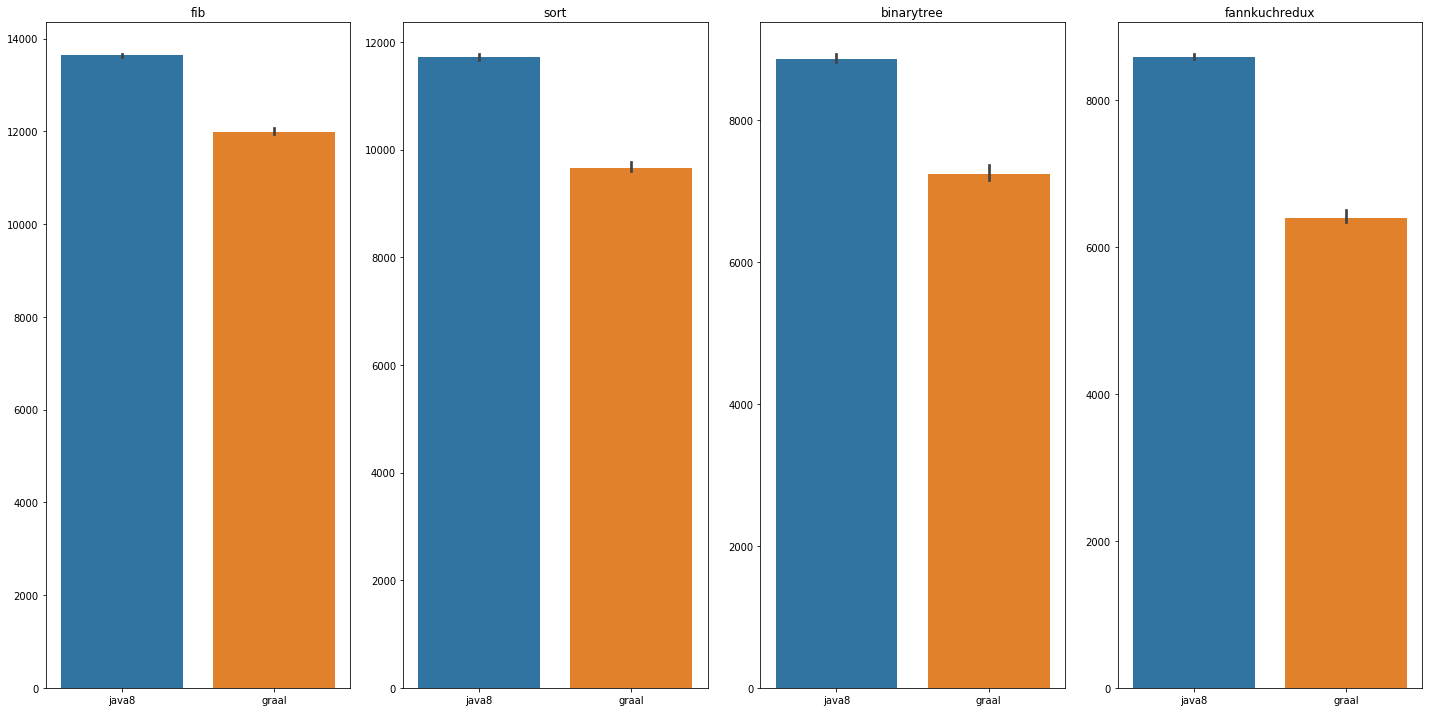

In [26]:
plt.rcParams['figure.constrained_layout.use'] = False
fig = plt.figure(figsize=(20,10))
for (i, algo) in enumerate(['fib', 'sort', 'binarytree', 'fannkuchredux']):
    ax = fig.add_subplot(1, 4, i + 1)
    dico_perfs = {
        'java8': java8[algo],
        'graal': graal[algo],

    }
    from_dict = pd.DataFrame.from_dict(dico_perfs)
    
    a=average(java8[algo][10:])
    b=average(graal[algo][10:])
    
    print(algo)
    print('x' + str(round(1.0/(b/a),2)))

    sns.barplot(data=from_dict, ax=ax)
    #plt.xticks(rotation=90)
    ax.set_title(algo)
fig.tight_layout()